In [1]:
import pandas as pd

In [3]:
df = pd.read_sas('LLCP2018.XPT_',format='xport',encoding='utf-8')
df.head()

,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENM1,...,_MAM5022,_RFPAP34,_RFPSA22,_RFBLDS3,_COL10YR,_HFOB3YR,_FS5YR,_FOBTFS,_CRCREC,_AIDTST3
0,1.0,1.0,01052018,01,05,2018,1100.0,2018000001,2.018000e+09,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
1,1.0,1.0,01122018,01,12,2018,1100.0,2018000002,2.018000e+09,1.0,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
2,1.0,1.0,01082018,01,08,2018,1100.0,2018000003,2.018000e+09,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
3,1.0,1.0,01032018,01,03,2018,1100.0,2018000004,2.018000e+09,1.0,...,NaN,NaN,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
4,1.0,1.0,01122018,01,12,2018,1100.0,2018000005,2.018000e+09,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0


In [6]:
df.shape

(437436, 275)

In [ ]:
print(df.dtypes)

In [8]:
list(df.columns) 

['_STATE',
 'FMONTH',
 'IDATE',
 'IMONTH',
 'IDAY',
 'IYEAR',
 'DISPCODE',
 'SEQNO',
 '_PSU',
 'CTELENM1',
 'PVTRESD1',
 'COLGHOUS',
 'STATERE1',
 'CELLFON4',
 'LADULT',
 'NUMADULT',
 'NUMMEN',
 'NUMWOMEN',
 'SAFETIME',
 'CTELNUM1',
 'CELLFON5',
 'CADULT',
 'PVTRESD3',
 'CCLGHOUS',
 'CSTATE1',
 'LANDLINE',
 'HHADULT',
 'GENHLTH',
 'PHYSHLTH',
 'MENTHLTH',
 'POORHLTH',
 'HLTHPLN1',
 'PERSDOC2',
 'MEDCOST',
 'CHECKUP1',
 'EXERANY2',
 'SLEPTIM1',
 'CVDINFR4',
 'CVDCRHD4',
 'CVDSTRK3',
 'ASTHMA3',
 'ASTHNOW',
 'CHCSCNCR',
 'CHCOCNCR',
 'CHCCOPD1',
 'HAVARTH3',
 'ADDEPEV2',
 'CHCKDNY1',
 'DIABETE3',
 'DIABAGE2',
 'LASTDEN4',
 'RMVTETH4',
 'SEX1',
 'MARITAL',
 'EDUCA',
 'RENTHOM1',
 'NUMHHOL3',
 'NUMPHON3',
 'CPDEMO1B',
 'VETERAN3',
 'EMPLOY1',
 'CHILDREN',
 'INCOME2',
 'WEIGHT2',
 'HEIGHT3',
 'PREGNANT',
 'DEAF',
 'BLIND',
 'DECIDE',
 'DIFFWALK',
 'DIFFDRES',
 'DIFFALON',
 'SMOKE100',
 'SMOKDAY2',
 'STOPSMK2',
 'LASTSMK2',
 'USENOW3',
 'ALCDAY5',
 'AVEDRNK2',
 'DRNK3GE5',
 'MAXDRNKS',
 'FLU

In [30]:
# _HCVU651  Calculated variable for respondents aged 18-64 who have any form of health care coverage. 
# 1: Have health care coverage 
# 2: Do not have health care coverage 
# 3: Don’t know/ Not Sure, Refused or Missing
# _AGE_G    Calculated variable for six-level imputed age category. 
df_HCVU651=df[['_AGE_G','_HCVU651']]
df_HCVU651 = df_HCVU651[df_HCVU651._AGE_G != 6]
df_HCVU651.head()
grouped_HCVU651=df_HCVU651.groupby('_AGE_G')['_HCVU651'].value_counts().sort_index()

print(grouped_HCVU651)

_AGE_G  _HCVU651
1.0     1.0         21480
        2.0          3963
        9.0           569
2.0     1.0         38653
        2.0          7677
        9.0           274
3.0     1.0         44366
        2.0          7208
        9.0           891
4.0     1.0         57068
        2.0          6680
        9.0          4088
5.0     1.0         81982
        2.0          6936
        9.0          1677
Name: _HCVU651, dtype: int64


([<matplotlib.axis.XTick at 0x2780805fba8>,
 <a list of 5 Text xticklabel objects>)

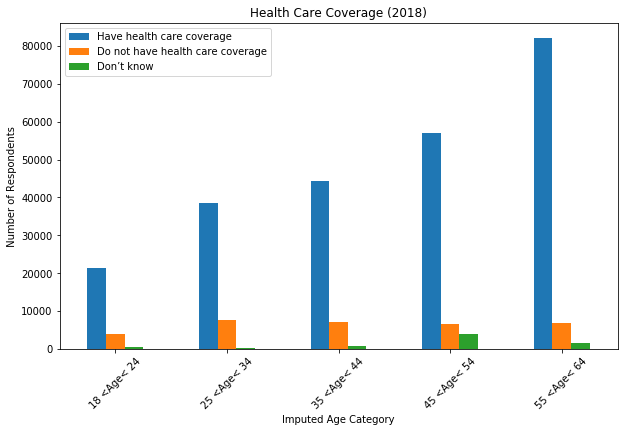

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
grouped_HCVU651.unstack().plot(kind='bar', figsize=(10, 6))
plt.xlabel('Imputed Age Category') # add to x-label to the plot
plt.ylabel(' Number of Respondents ') # add y-label to the plot
plt.title('Health Care Coverage (2018)') # add title to the plot
plt.legend(["Have health care coverage","Do not have health care coverage","Don’t know"], loc=2)
plt.xticks(range(5),("18 <Age< 24", "25 <Age< 34", "35 <Age< 44", "45 <Age< 54", "55 <Age< 64"),rotation=45)


In [103]:
#_INCOMG   Calculated variable for income categories. 
#1 Less than $15,000 (INCOME2=1,2) 
#2 $15,000 to less than $25,000 (INCOME2=3,4) 
#3 $25,000 to less than $35,000 (INCOME2=5) 
#4 $35,000 to less than $50,000 (INCOME2=6) 
#5 $50,000 or more (INCOME2=7,8) 
#9 Don’t know/ Not sure/ Missing (INCOME2=77,99, or missing) 
df_INCOMG=df[['_AGE_G','_INCOMG']]
df_INCOMG =df_INCOMG[df_INCOMG._AGE_G != 6]
df_INCOMG =df_INCOMG[df_INCOMG._INCOMG != 9]
df_INCOMG.head(10)


,_AGE_G,_INCOMG
1,2.0,2.0
8,5.0,5.0
9,4.0,5.0
11,5.0,4.0
12,4.0,3.0
14,4.0,5.0
18,4.0,5.0
21,4.0,2.0
23,5.0,1.0
26,5.0,2.0


In [104]:
df_INCOMG_COUNT=df_INCOMG['_INCOMG'].value_counts().to_frame()
df_INCOMG_COUNT.index.name = '_INCOMG'
df_INCOMG_COUNT.rename(columns={'_INCOMG': 'Value_Counts'}, inplace=True)
print(df_INCOMG_COUNT)

         Value_Counts
_INCOMG              
5.0            131421
2.0             34805
4.0             29682
1.0             23472
3.0             21650


In [105]:
df['_AGE_G'].unique()

array([6., 2., 3., 4., 5., 1.])

In [106]:
grouped_INCOMG = df_INCOMG.groupby('_AGE_G')['_INCOMG'].value_counts().sort_index().to_frame()
grouped_INCOMG.rename(columns={'_INCOMG': 'Value_Counts'}, inplace=True)
#grouped_INCOMG = df_INCOMG.groupby(['_AGE_G','_INCOMG'],as_index=False)
print(grouped_INCOMG)

                Value_Counts
_AGE_G _INCOMG              
1.0    1.0              2589
       2.0              4182
       3.0              2404
       4.0              2825
       5.0              7146
2.0    1.0              3444
       2.0              6615
       3.0              4597
       4.0              6049
       5.0             19748
3.0    1.0              3620
       2.0              6121
       3.0              3855
       4.0              5275
       5.0             27428
4.0    1.0              5407
       2.0              7104
       3.0              4211
       4.0              6131
       5.0             35200
5.0    1.0              8412
       2.0             10783
       3.0              6583
       4.0              9402
       5.0             41899


In [107]:
grouped_INCOMG_pivot = grouped_INCOMG.unstack().transpose()
#.pivot(index='_AGE_G', columns='_INCOMG')
grouped_INCOMG_pivot

_AGE_G                 1.0    2.0    3.0    4.0    5.0
             _INCOMG                                  
Value_Counts 1.0      2589   3444   3620   5407   8412
             2.0      4182   6615   6121   7104  10783
             3.0      2404   4597   3855   4211   6583
             4.0      2825   6049   5275   6131   9402
             5.0      7146  19748  27428  35200  41899

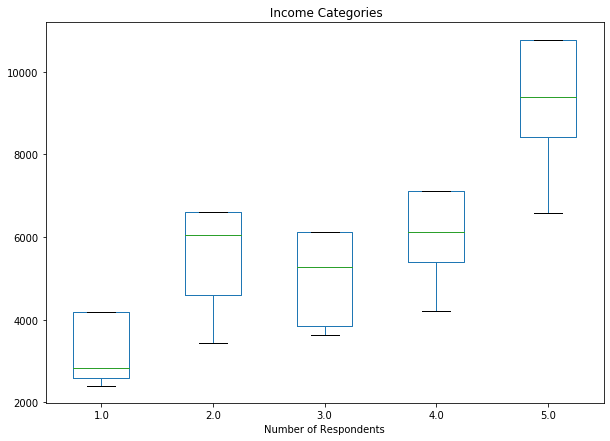

In [113]:
grouped_INCOMG_pivot.plot(kind='box', figsize=(10, 7),showfliers=False)
plt.title('Box Plot of Income Categories')
plt.xlabel('Number of Respondents')
plt.show()


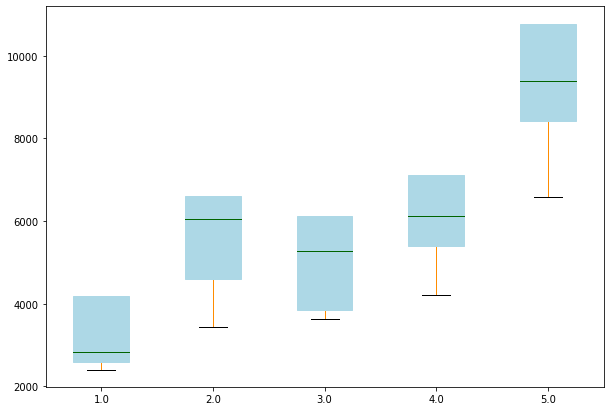

In [121]:
Labels=['1: Less than $15,000' , '2: $15,000 to less than $25,000','3: $25,000 to less than $35,000','4: $35,000 to less than $50,000','5: $50,000 or more']
props = dict(boxes="LightBlue", whiskers="DarkOrange", medians="DarkGreen", caps="Black")
grouped_INCOMG_pivot.plot.box(color=props, patch_artist=True,figsize=(10, 7), showfliers=False)
plt.show()